In [2]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *

In [3]:
dqn_training = train_dqn(true_env, 1000, "Test")

In [8]:
dqn_training.evaluate_policy(10000)

-0.711

In [ ]:
episodes = []
tr = transition_model_full()
hr_counts = init_hr_counts()
bp_counts = init_bp_counts()
o2_counts = init_o2_counts()
glu_counts = init_glu_counts()
state_counts = hr_counts, bp_counts, o2_counts, glu_counts

In [5]:
env = TrModelEnv(transition_model_factored(*state_counts))
model_training = train_dqn(env=env, nr_iter=10000, name="TS")
policies = [model_training.get_policy()]

In [6]:
nr_iterations = 100
nr_episodes = 1

In [36]:
for _ in range(nr_iterations):
    tr = transition_model_factored(*state_counts)
    env = TrModelEnv(tr)
    model_training = train_dqn(env=env, nr_iter=10000, name="TS")
    policy = model_training.get_policy()
    policies.append(policy)
    # Run episodes with the current policy
    for _ in range(nr_episodes):
        episode = run_episode(policy)
        episodes.append(episode)
        state_counts = update_factored_counts(episode, *state_counts)

In [37]:
ts_eval = ThompsonSampling(len(episodes), episodes, "TS-1", {"description": f"Running {nr_episodes} episodes per iteration. Updating the policy upon each iteration.", "optimization": "DQN with 10000 iterations", })
ts_eval.save()


'data/thompson_sampling/TS-1.pkl'

In [38]:
len(ts_eval.episodes)


142

In [39]:
ts_eval.evaluate_policy(100000)

-0.4297

In [40]:
dqn_training.evaluate_policy(100000)

-0.70551

In [41]:
# plot_rewards([dqn_training, ts_eval], ts_eval.nr_iterations, 4)

In [42]:
mean_rewards = []
for policy in policies:
    mean_rewards.append(evaluate_policy(policy, 5000))

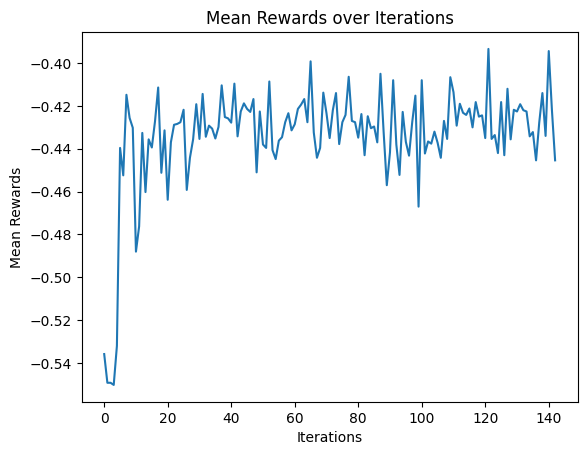

In [43]:
plt.plot(mean_rewards)
plt.xlabel('Iterations')
plt.ylabel('Mean Rewards')
plt.title('Mean Rewards over Iterations')
plt.show()

In [44]:
model_training = train_dqn(env=env, nr_iter=100000, name="TS")


In [45]:
model_training.evaluate_policy(100000)

-0.35785

# Value iteration

In [9]:
episodes_VI = []
hr_counts = init_hr_counts()
bp_counts = init_bp_counts()
o2_counts = init_o2_counts()
glu_counts = init_glu_counts()
state_counts = hr_counts, bp_counts, o2_counts, glu_counts
learned_VI = []
V = np.zeros(len(STATES))

In [ ]:
for _ in range(nr_iterations):
    tr = transition_model_factored(*state_counts)
    opt_pol = matrix_value_iteration(V, tr)
    learned_VI.append(opt_pol)
    pol, V = opt_pol
    # Run episodes with the current policy
    for _ in range(nr_episodes):
        episode = run_episode(pol)
        episodes_VI.append(episode)
        state_counts = update_factored_counts(episode, *state_counts)

In [11]:
len(episodes_VI)

45

In [13]:
ts_eval_VI = ThompsonSampling(len(episodes_VI), episodes_VI, "TS-VI-1", {"description": f"Running {nr_episodes} episodes per iteration. Updating the policy upon each iteration.", "optimization": "Value iteration", })
ts_eval_VI.save()

'data/thompson_sampling/TS-VI-1.pkl'

In [14]:
mean_rewards_VI = []
for (pol, V) in learned_VI:
    mean_rewards_VI.append(evaluate_policy(pol, 5000))

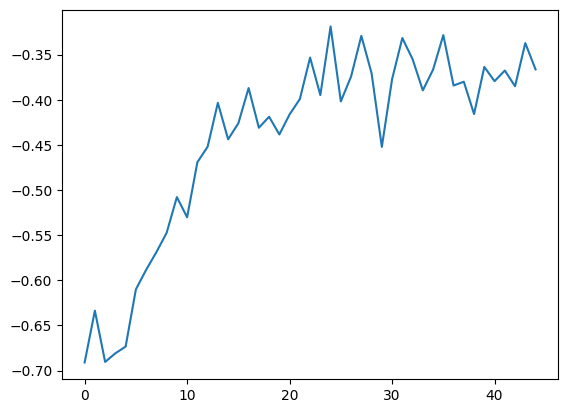

In [15]:
plt.plot(mean_rewards_VI)
